In [64]:
import numpy as np
import tensorflow as tf
import pickle
import pandas as pd

In [65]:
X_train = pickle.load(open("X_train.pkl", "rb"))
y_train = pickle.load(open("y_train.pkl", "rb"))

In [66]:
def model(input, output, epochs, reg = 0.05):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Normalization())
    model.add(tf.keras.layers.Dense(units=256, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(reg))
    model.add(tf.keras.layers.Dense(units=128, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(reg))
    model.add(tf.keras.layers.Dense(units=64, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(reg))
    model.add(tf.keras.layers.Dense(units=11, activation="softmax"))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss="binary_crossentropy", metrics=["accuracy"])

    history = model.fit(input, output, epochs=epochs, validation_split=0.2, batch_size=32, verbose=0)
    
    return model, history    

In [67]:
model, history = model(input=X_train, output=y_train, epochs=1000)

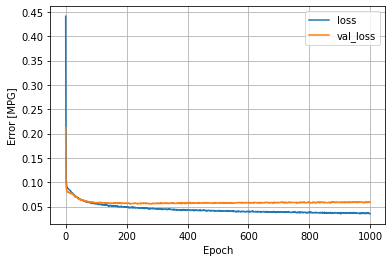

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

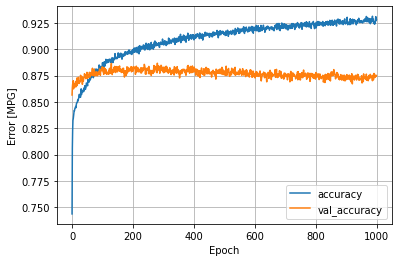

In [69]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [70]:
model.save("models/6.h5")